In [55]:
import numpy as np 
import pandas as pd
import plotly
import plotly.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
from math import cos, asin, sqrt
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians

In [56]:
#reading the file
df = pd.read_csv('new_locations.csv')
df.head()

,vehicle,lat,lon
0,fartyg/alv-snabben-5,57.706228,11.955972
1,tag/9035,58.181863,13.559319
2,tag/3142,58.072659,11.824759
3,tag/9084,58.354123,11.923729
4,sparvagn/438,57.707038,11.995197


In [57]:
df_short = df[0:2000]

In [58]:
df_short.shape[0]

2000

In [59]:
df=df_short

In [60]:
#function to calculate distances and 
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

def closest(data, v):
    return min(data, key=lambda p: distance(v[0],v[1],p[0],p[1]))

In [61]:
df.shape[0]

2000

In [62]:
df['location'] = list(zip(df.lat, df.lon))

In [63]:

#generating artificial data
bus_type = []
# having bus number 
# Assumptions: if direction of the buses are opposite they will have different number
for i in range(df.shape[0]):
    df['vehicle'][i]=df['vehicle'][i][:3]
    b_type = np.random.randint(1,20)
    bus_type.append(b_type)
df['vehicle_type'] = bus_type
# Finding the location of the nearest vehicles and 
vehicle_spec = {}
vehicles_numbers = df.vehicle_type.unique()
nearest_distance = []
nearest_neighbour_list = []
for v in vehicles_numbers:
    vehicle_spec[v]=df.loc[df['vehicle_type'] == v,'location']
    coordinates=vehicle_spec[v]
    
    for index,geoloc in enumerate(coordinates):
        #print(type(coordinates[0][0]))
        remainingpoint_point = coordinates.drop(coordinates.index[index])
        nearest_neighbour = closest(remainingpoint_point, geoloc)
        lat1=geoloc[0]
        lon1=geoloc[1]
        lat2=nearest_neighbour[0]
        lon2=nearest_neighbour[1]
        nearest_dis = distance(lat1, lon1, lat2, lon2)
        nearest_distance.append(nearest_dis)
        nearest_neighbour_list.append(nearest_neighbour)
        
df['NearestN'] = nearest_neighbour_list
df['NNdistance'] =  nearest_distance   
time_list=[]
score_list=[]
for i in df['NNdistance']:
    if i < 0.5:
        score_list.append(1)
        low_second = np.random.randint(1,10,1)
        time_list.append(pd.Timestamp(2017, 1, 1, 12, 53, low_second))
        
    else:
        score_list.append(0)
        high_second = np.random.randint(10,59,1)
        time_list.append(pd.Timestamp(2017, 1, 1, 12, 53, high_second))
    
# adding it to our data
df['queue'] = score_list
df['time'] = time_list

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



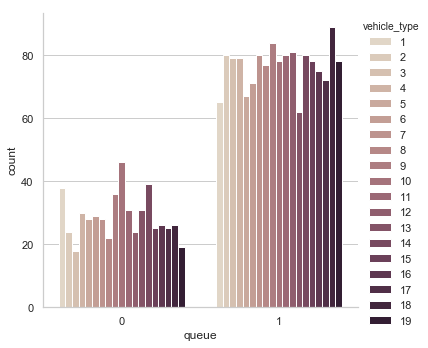

In [64]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
#titanic = sns.load_dataset("titanic")
sns.catplot(x="queue", kind="count", palette="ch:.25",hue="vehicle_type", data=df);
#sns.catplot(x="vehicle_type", kind="count", hue="vehicle_type", kind="bar", data=df);

In [65]:
X =  df.drop(columns='queue')
Y =  df['queue']

In [66]:
#from sklearn.linear_model import LogisticRegression
#from sklearn import metrics
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
#logreg = LogisticRegression()
#logreg.fit(X_train, y_train)